<a href="https://colab.research.google.com/github/DastanIqbal/LearnOpenCV/blob/main/src/OpenCV/dlap/week5/preTrainedModelKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using Pre-trained models**

In [2]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet

vgg_model = vgg16.VGG16(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')
resnet_model = resnet50.ResNet50(weights='imagenet')
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
import urllib.request
filename = "dog.jpg"
url_of_image = "https://upload.wikimedia.org/wikipedia/commons/9/9c/Yellow_Labrador_Retriever_2.jpg"
urllib.request.urlretrieve(url_of_image, filename)

('dog.jpg', <http.client.HTTPMessage at 0x7e8455044290>)

PIL image size (224, 224)


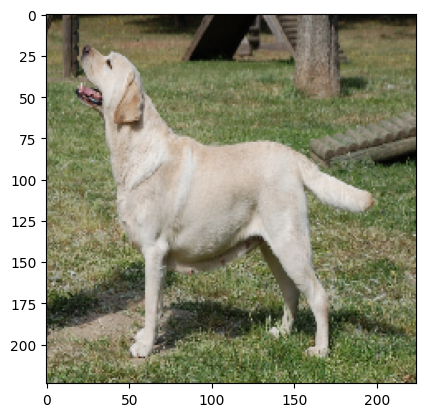

numpy array size (224, 224, 3)


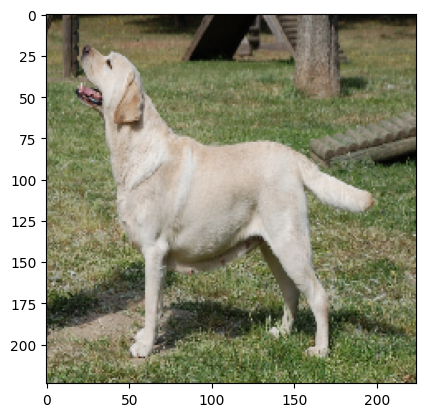

image batch size (1, 224, 224, 3)


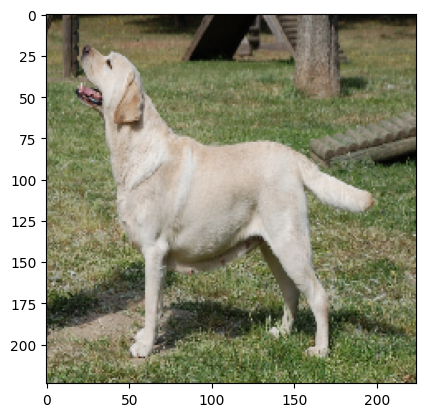

In [9]:
original = load_img(filename, target_size=(224, 224))
print("PIL image size", original.size)
plt.imshow(original)
plt.show()


#Convert PIL image to numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)

numpy_image = img_to_array(original)
print("numpy array size", numpy_image.shape)
plt.imshow(np.uint8(numpy_image))
plt.show()

#Convert the image into the batch of image size
image_batch = np.expand_dims(numpy_image, axis=0)
print("image batch size", image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

**VGG16 Network**

In [10]:
processed_image = vgg16.preprocess_input(image_batch.copy())
predictions = vgg_model.predict(processed_image)
label_vgg = decode_predictions(predictions)
label_vgg

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02099712', 'Labrador_retriever', 0.42112094),
  ('n02104029', 'kuvasz', 0.048872318),
  ('n02099601', 'golden_retriever', 0.04729812),
  ('n02090721', 'Irish_wolfhound', 0.03359568),
  ('n02109047', 'Great_Dane', 0.03350309)]]

**ResNet50 Network**

In [11]:
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions = resnet_model.predict(processed_image)
label_resnet = decode_predictions(predictions)
label_resnet

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


[[('n02099712', 'Labrador_retriever', 0.37355736),
  ('n02108422', 'bull_mastiff', 0.08689044),
  ('n02091831', 'Saluki', 0.041622218),
  ('n02099601', 'golden_retriever', 0.034011472),
  ('n02104029', 'kuvasz', 0.03262082)]]

**MobileNet Network**

In [12]:
processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions = mobilenet_model.predict(processed_image)
label_mobilenet = decode_predictions(predictions)
label_mobilenet

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step


[[('n02099712', 'Labrador_retriever', 0.9107458),
  ('n02099601', 'golden_retriever', 0.04653957),
  ('n02104029', 'kuvasz', 0.013772496),
  ('n02108422', 'bull_mastiff', 0.004966304),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.0037109905)]]

**Inception V3 Network**

In [13]:
original = load_img(filename,target_size=(299,299))
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis = 0)
processed_image = inception_v3.preprocess_input(image_batch.copy())
predictions = inception_model.predict(processed_image)
label_inception = decode_predictions(predictions)
label_inception

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


[[('n02099712', 'Labrador_retriever', 0.8577839),
  ('n02099601', 'golden_retriever', 0.057730123),
  ('n02108422', 'bull_mastiff', 0.0052045733),
  ('n02104029', 'kuvasz', 0.0047826283),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.0030644014)]]

**Comparison of Results from various Models**

In [24]:
import cv2
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))

x = 200

cv2.putText(numpy_image, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]),(x,40),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),3)
cv2.putText(numpy_image, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]),(x,75),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),3)
cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]),(x,110),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),3)
cv2.putText(numpy_image, "Resnet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]),(x,145),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),3)

numpy_image = cv2.resize(numpy_image,(700,700))
cv2.imwrite("{}_output.jpg".format(filename.split("/")[-1].split('.')[0]),cv2.cvtColor(numpy_image,cv2.COLOR_RGB2BGR))

True

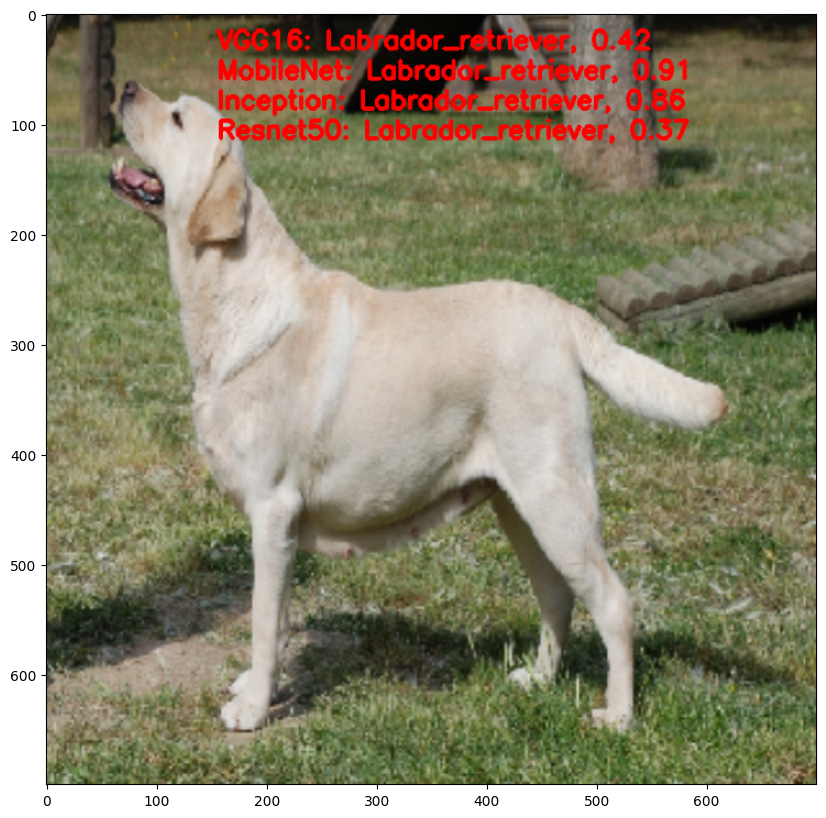

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(numpy_image)
plt.show()